# Process Discovery with the Alpha Algorithm in PM4PY

In [1]:
import pandas as pd
from IPython.display import Markdown, display


In [2]:
fn = 'ArtificialPatientTreatment.csv'
events = pd.read_csv(fn)

events.columns = ['patient', 'action', 'resource', 'datetime']
events['datetime'] = pd.to_datetime(events['datetime'])


In [3]:
#!pip install pm4py --user
from pm4py.objects.conversion.log import converter as log_converter

# process mining 
from pm4py.algo.discovery.alpha import algorithm as alpha_miner

# viz
from pm4py.visualization.petri_net import visualizer as pn_visualizer

import pm4py

In [4]:
eventlog = events.copy()
### Specify which columns correspond to case (case:concept:name), 
###event (concept:name) and timestamp (time:timestamp) - rename columns in accordance
###with pm4py

eventlog.rename(columns={'datetime': 'time:timestamp', 'patient': 'case:concept:name', 'action': 'concept:name', 'resource': 'org:resource'}, inplace=True)

## Convert to log format
log = log_converter.apply(eventlog)


### Alpha algorithm

In [5]:
# alpha miner
net, initial_marking, final_marking = alpha_miner.apply(log)

In [6]:
net

places: [ ({' Blood test'}, {' Second consult'}), ({' First consult'}, {' Blood test'}), ({' First consult'}, {' Physical test'}), ({' First consult'}, {' X-ray scan'}), ({' Physical test'}, {' Second consult'}), ({' Second consult'}, {' Surgery', ' Medicine'}), ({' Surgery', ' Medicine'}, {' Final consult'}), ({' X-ray scan'}, {' Second consult'}), end, start ]
transitions: [ ( Blood test, ' Blood test'), ( Final consult, ' Final consult'), ( First consult, ' First consult'), ( Medicine, ' Medicine'), ( Physical test, ' Physical test'), ( Second consult, ' Second consult'), ( Surgery, ' Surgery'), ( X-ray scan, ' X-ray scan') ]
arcs: [ ( Blood test, ' Blood test')->({' Blood test'}, {' Second consult'}), ( Final consult, ' Final consult')->end, ( First consult, ' First consult')->({' First consult'}, {' Blood test'}), ( First consult, ' First consult')->({' First consult'}, {' Physical test'}), ( First consult, ' First consult')->({' First consult'}, {' X-ray scan'}), ( Medicine, ' Me

In [7]:
initial_marking

['start:1']

In [8]:
final_marking

['end:1']

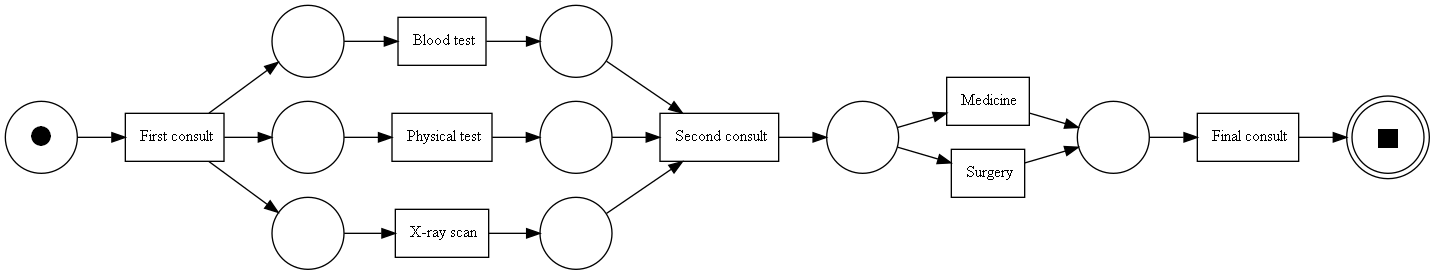

In [9]:
# Visualise
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)

replaying log with TBR, completed variants ::   0%|          | 0/15 [00:00<?, ?it/s]

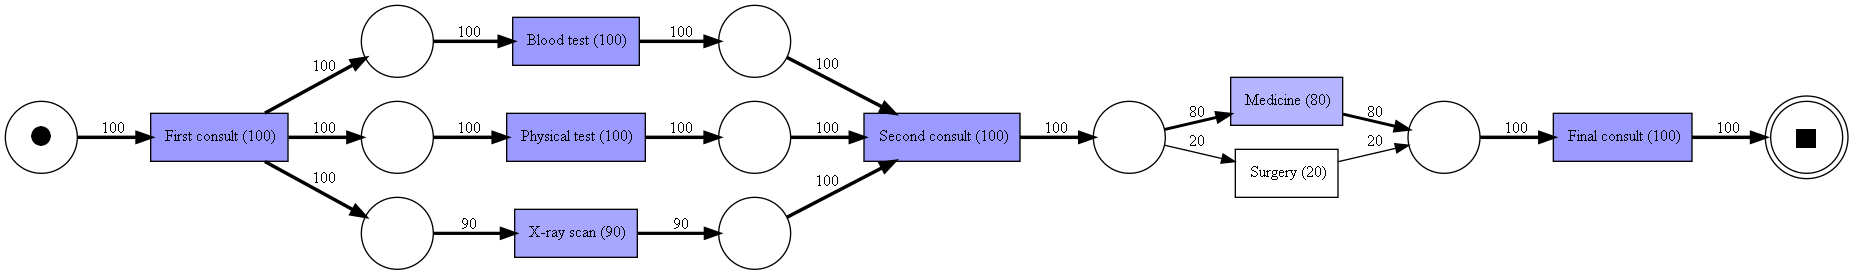

In [10]:
# add information about frequency to the viz 
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
gviz2 = pn_visualizer.apply(net, initial_marking, final_marking, 
                           parameters=parameters, 
                           variant=pn_visualizer.Variants.FREQUENCY, 
                           log=log)

pn_visualizer.view(gviz2)

### Alternative Process Discovery Algorithm: Inductive Miner


In [11]:
net2, initial_marking2, final_marking2 = pm4py.discover_petri_net_inductive(log)

c:\Program Files\Anaconda3\lib\site-packages\pm4py\utils.py:503: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


replaying log with TBR, completed variants ::   0%|          | 0/15 [00:00<?, ?it/s]

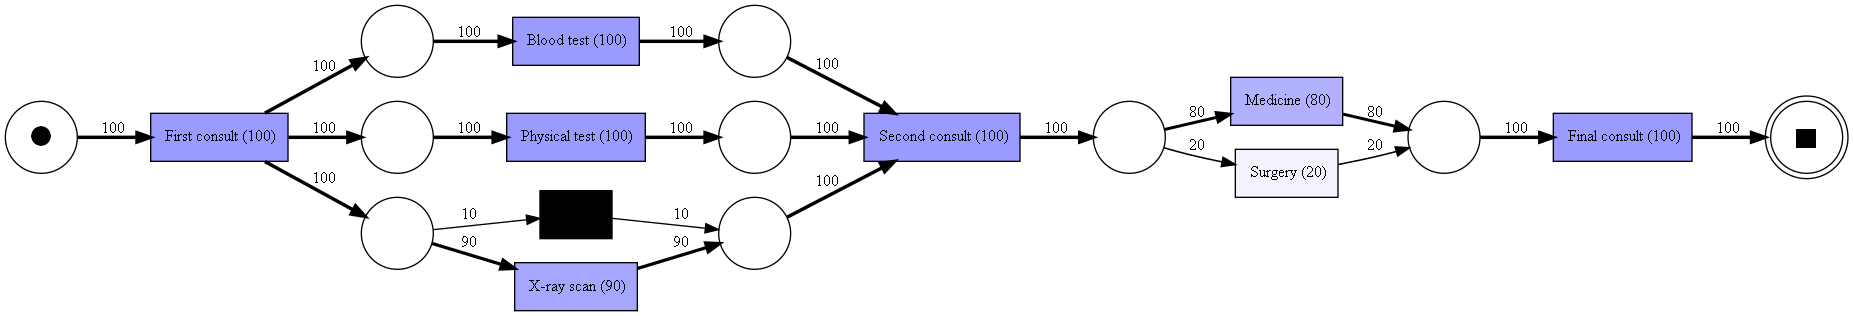

In [12]:
gviz3 = pn_visualizer.apply(net2, initial_marking2, final_marking2, 
                           parameters=parameters, 
                           variant=pn_visualizer.Variants.FREQUENCY, 
                           log=log)

pn_visualizer.view(gviz3)